<a href="https://colab.research.google.com/github/viabrinsa/PCVK_VirginiaAbrinsa/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

# Accessing My Googlee Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import glob

Gamma Correction pada citra
--------------------------------
Masukan Nilai Gamma : 5


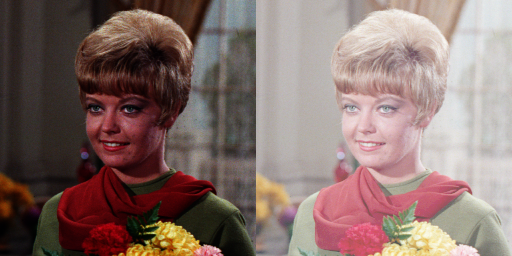

In [19]:
#no1 gamma
print('Gamma Correction pada citra')
print('--------------------------------')
try:
  nilaiGamma = int(input('Masukan Nilai Gamma : '))
except ValueError:
  print('Error, not a number')
  
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)


img = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
gammaImg = gammaCorrection(img, nilaiGamma)

final_frame = cv.hconcat((img, gammaImg))
cv2_imshow(final_frame)

Masukan Nilai Bit Depth : 50


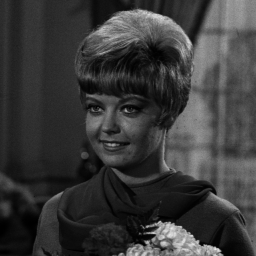

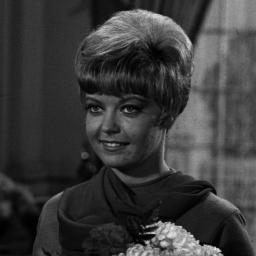

In [20]:
original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

try :
  bit = int(input('Masukan Nilai Bit Depth : '))
except ValueError :
  print('Number Error')

level = 255/(2**bit)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

  
final_frame = cv.hconcat((original, depth_image))
cv2_imshow(depth_image)
cv2_imshow(original)

In [33]:

cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

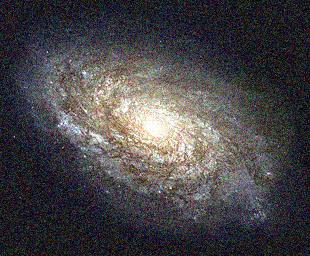

In [34]:
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [35]:
def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.350399101026802


In [38]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/pcvk/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.542202963976983 (dB)


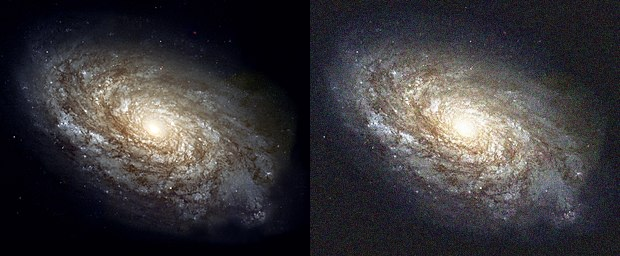

In [39]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.530499118710612 (dB)


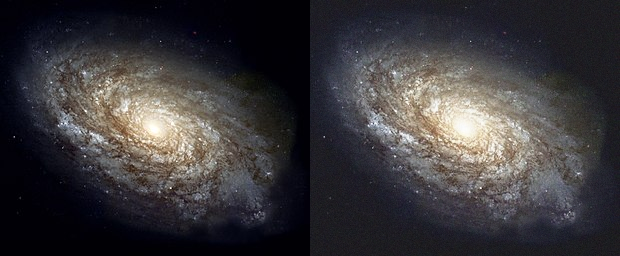

In [57]:
#30
dst = cv_img[0]
noise_number = 30
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.48647045591468 (dB)


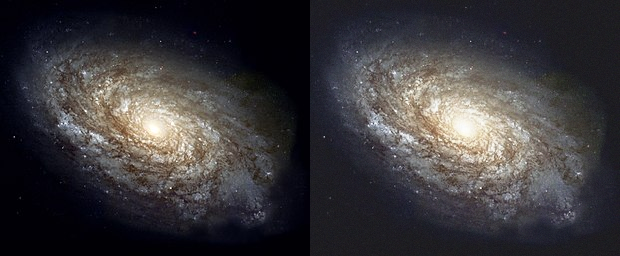

In [54]:
#60
dst = cv_img[0]
noise_number = 60
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.50161946700552 (dB)


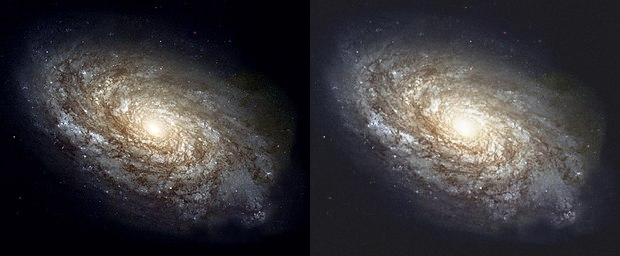

In [56]:
#80
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.507862776779177 (dB)


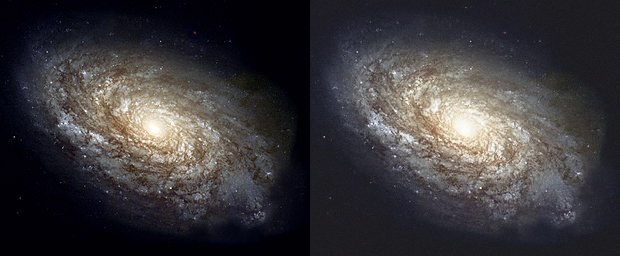

In [55]:
#100
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

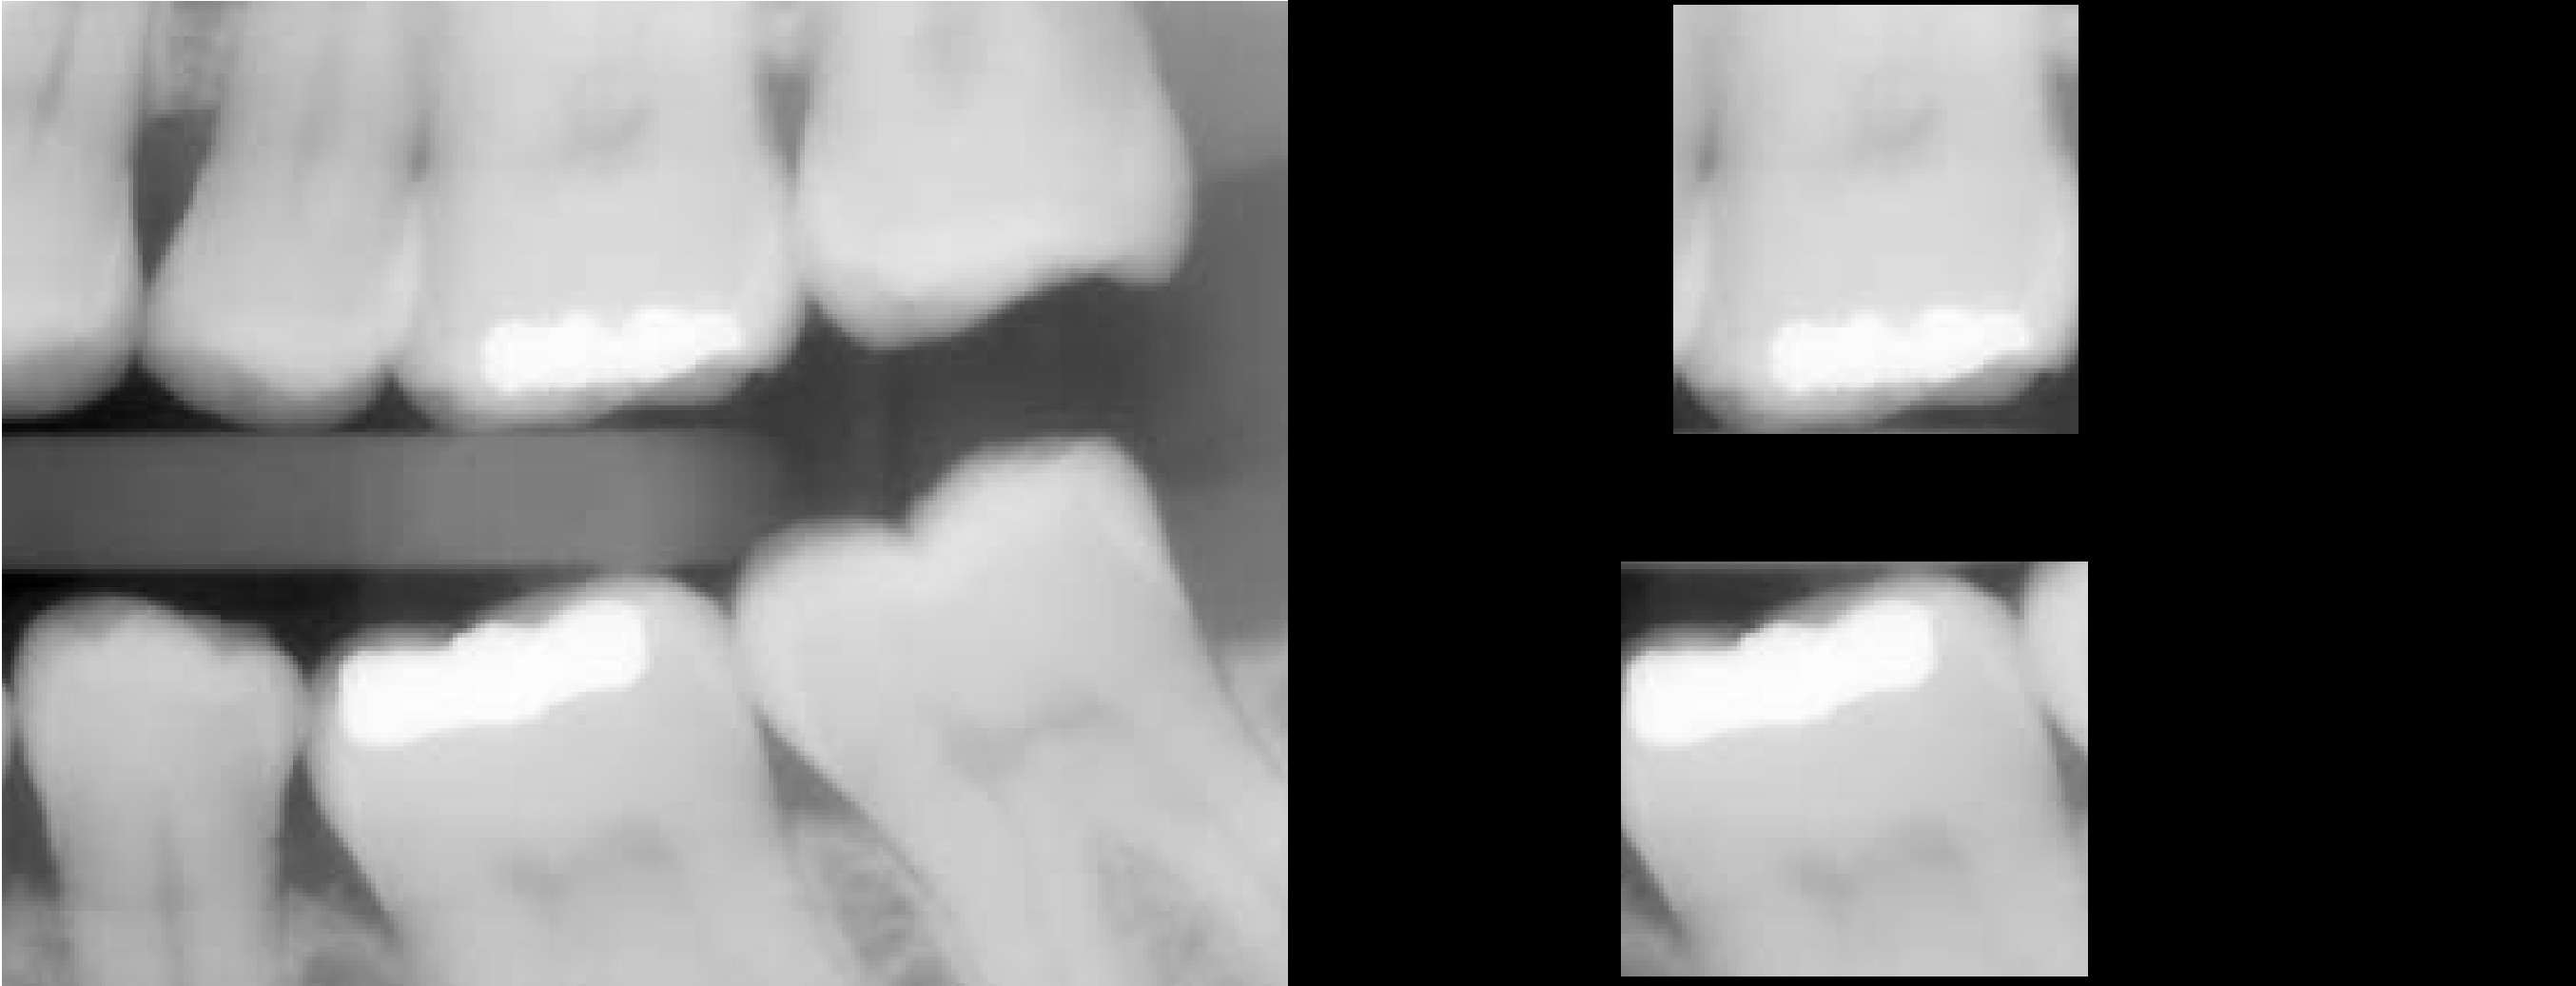

In [42]:
#No 4
img = cv.imread('/content/drive/MyDrive/pcvk/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)

mask = cv.rectangle(mask,pt1=(350,590),pt2=(840,1025),color=(255,255,255),thickness=-1)
result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(830,455),color=(255,255,255),thickness=-1)
result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

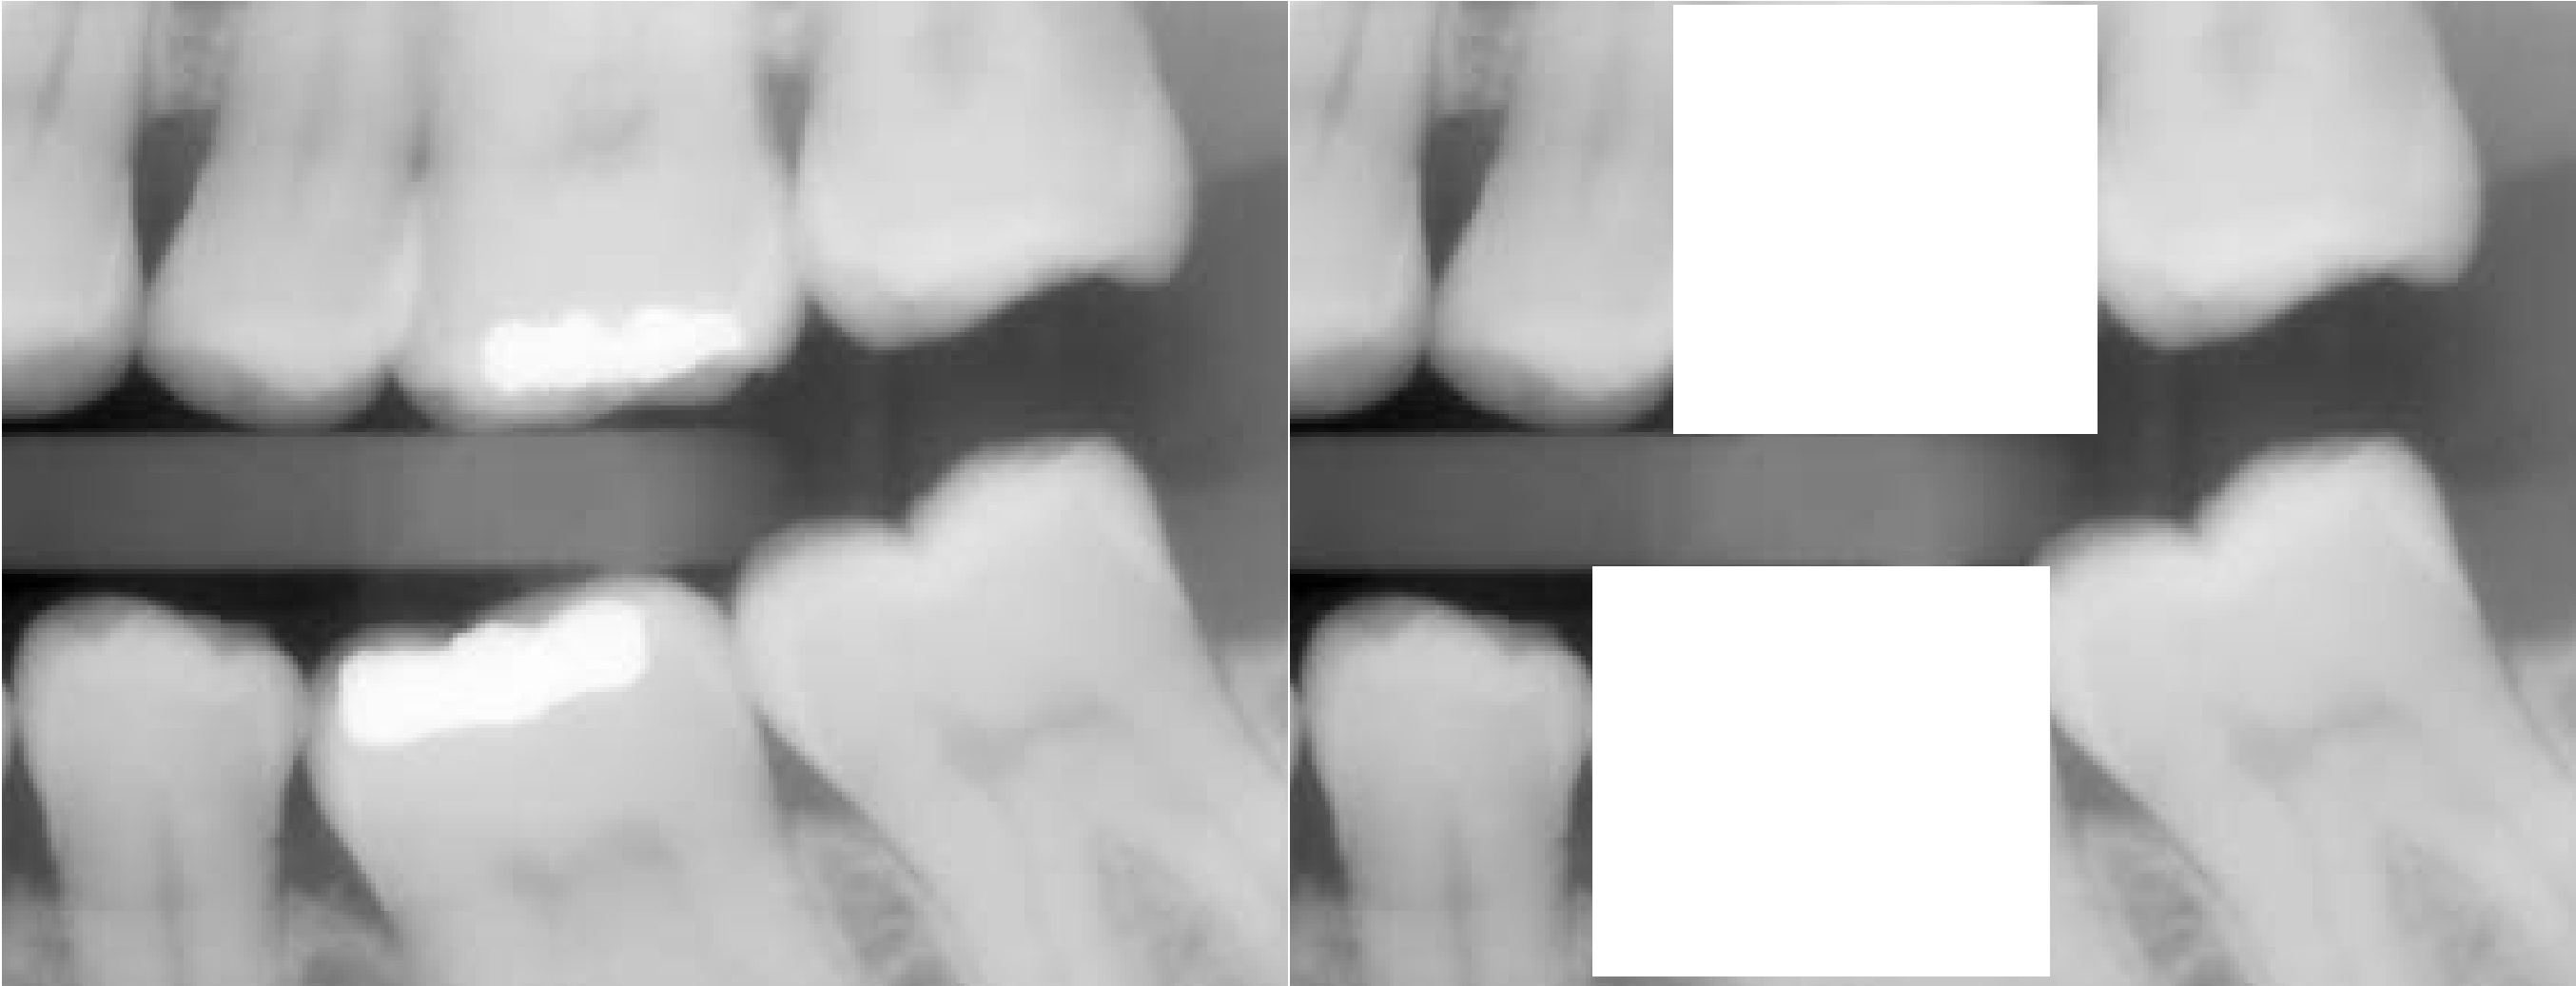

In [45]:
#No 5 OR

img = cv.imread('/content/drive/MyDrive/pcvk/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

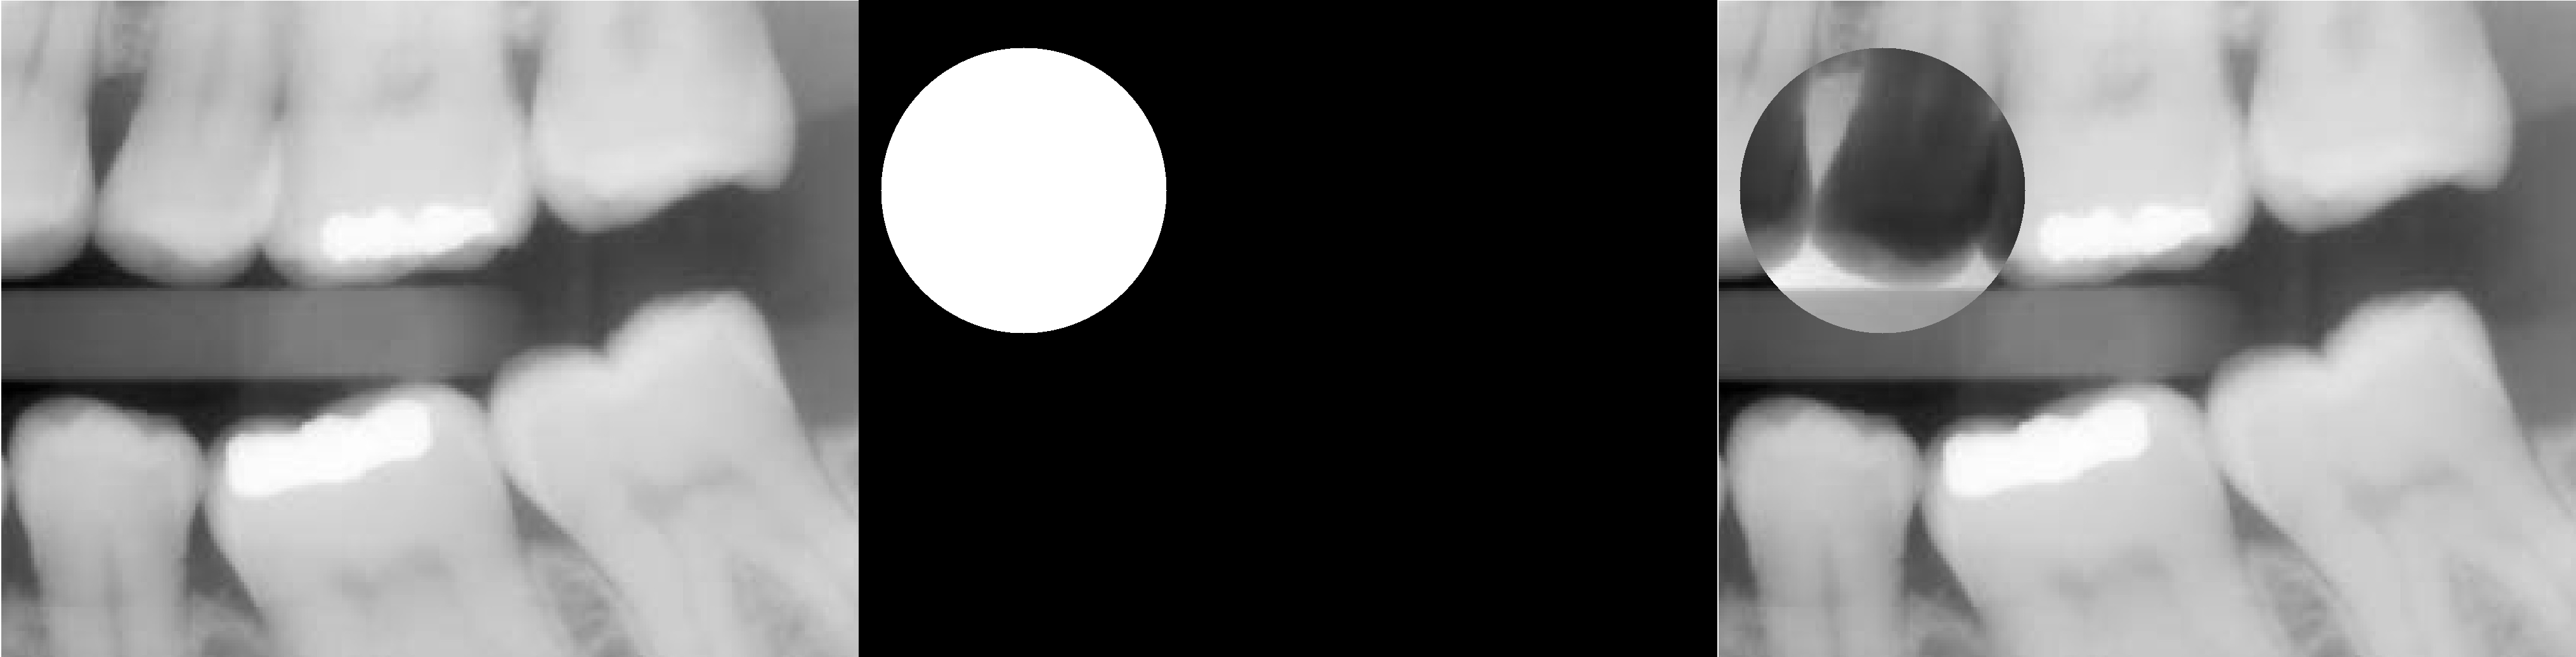

In [47]:
#NOT


img = cv.imread('/content/drive/MyDrive/pcvk/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

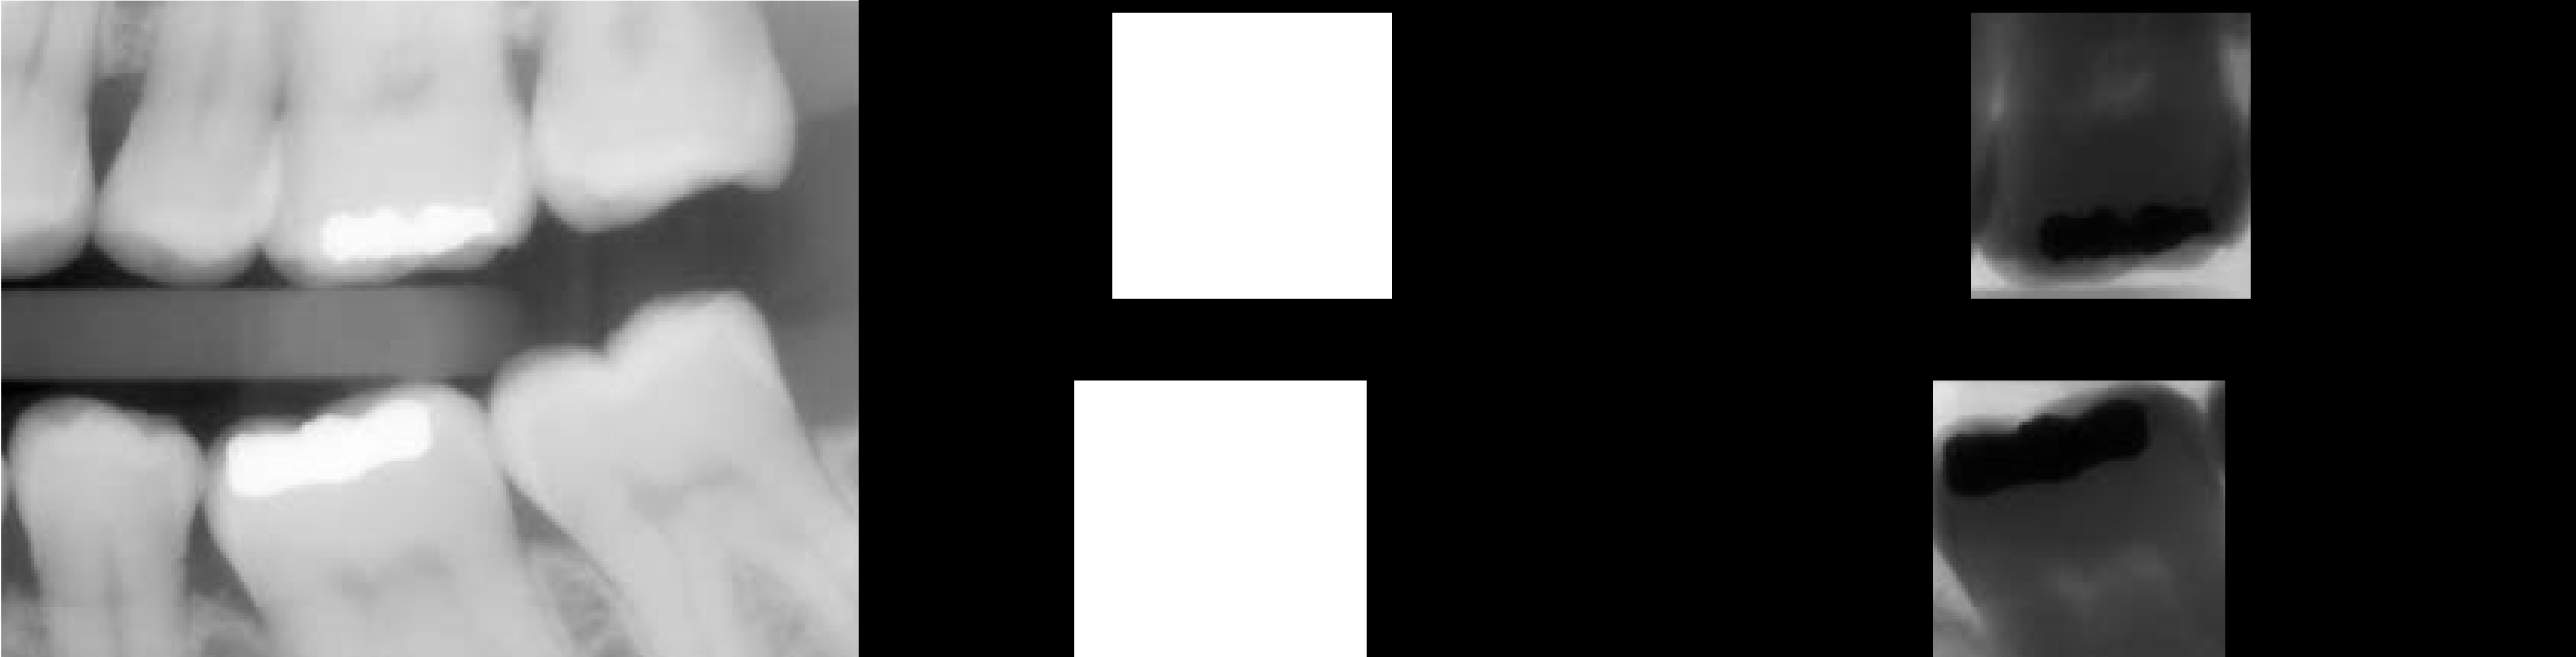

In [48]:
img = cv.imread('/content/drive/MyDrive/pcvk/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(400,20),pt2=(840,470),color=(255,255,255), thickness=-1)
mask = cv.rectangle(mask,pt1=(340,600),pt2=(800,1200),color=(255,255,255), thickness=-1)

result = ~img & mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


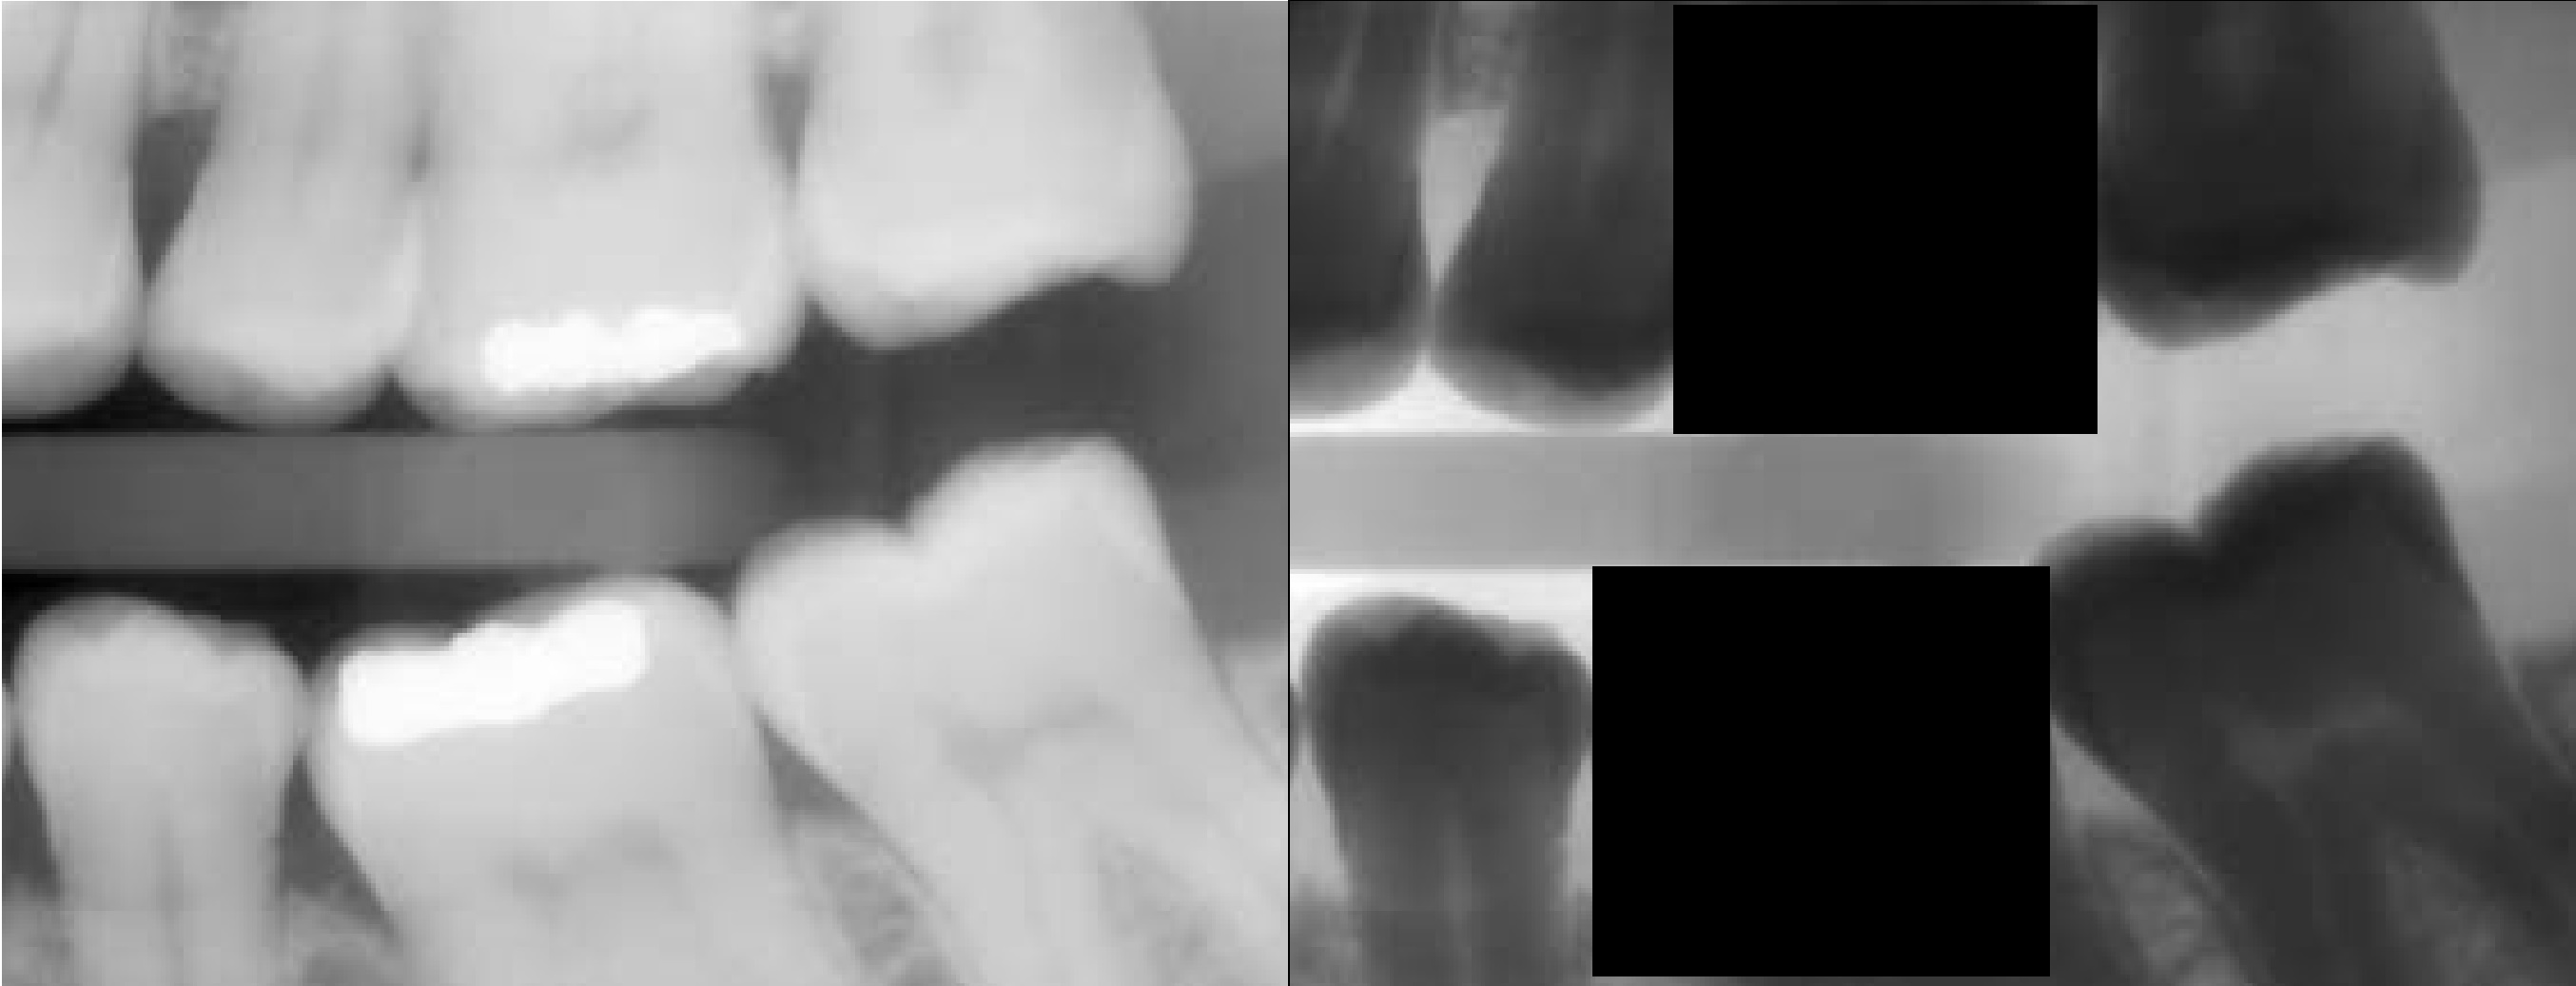

In [50]:
#XOR
img = cv.imread('/content/drive/MyDrive/pcvk/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)